# Laboratorium 1

## Treść zadania
Przygotuj następujące zbiory punktów (2D, współrzędne rzeczywiste typu double):  
a. 10^5 losowych punktów o współrzędnych z przedziału [-1000, 1000],  
b. 10^5 losowych punktów o współrzędnych z przedziału [-10 14 , 1014 ],  
c. 1000 losowych punktów leżących na okręgu o środku (0,0) i promieniu R=100,  
d. 1000 losowych punktów o współrzędnych z przedziału [-1000, 1000] leżących na prostej wyznaczonej przez wektor (a,b) przyjmij a = [-1.0, 0.0], b = [1.0, 0.1]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random, math
%matplotlib inline

## Rozwiązanie
*a. 10^5 losowych punktów o współrzędnych z przedziału [-1000, 1000]*

In [4]:
points_a = [(random.uniform(-1000, 1000), random.uniform(-1000, 1000)) for _ in range(10**5)]

plt.scatter(*zip(*points_a), s=1)
plt.show()

NameError: name 'random' is not defined

*b. 10^5 losowych punktów o współrzędnych z przedziału [-10 14 , 1014 ]*

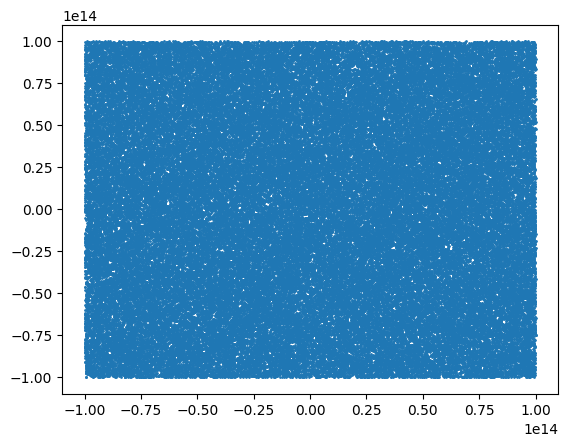

In [61]:
points_b = [(random.uniform(-10**14, 10**14), random.uniform(-10**14, 10**14)) for _ in range(10**5)]

plt.scatter(*zip(*points_b), s=1)
plt.show()

*c. 1000 losowych punktów leżących na okręgu o środku (0,0) i promieniu R=100*

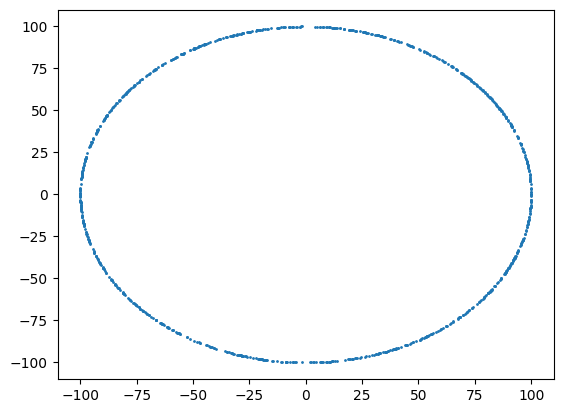

In [62]:
def rand_on_circle(origin, radius):
    org_x, org_y = origin
    t = random.uniform(0, 2*math.pi)
    return (org_x + radius * math.cos(t), org_y + radius * math.sin(t))

points_c = [rand_on_circle((0, 0), 100) for _ in range(1000)]

plt.scatter(*zip(*points_c), s=1)
plt.show()

*d. 1000 losowych punktów o współrzędnych z przedziału [-1000, 1000] leżących na prostej wyznaczonej przez wektor*

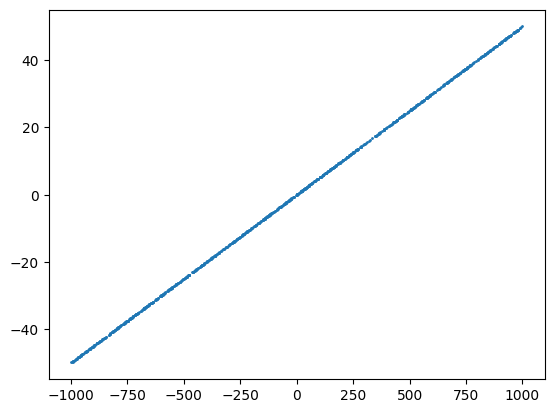

In [63]:
points_d = []
for i in range(1000):
    x = np.random.uniform(-1000, 1000)
    y = 0.05 * x + 0.05
    new_point = (x, y)
    points_d.append(new_point)

plt.scatter(*zip(*points_d), s=1)
    aplt.show()

### Funckcje wyznaznika

In [8]:
def det_1(a, b, c):
    a_x, a_y = a
    b_x, b_y = b
    c_x, c_y = c
    return (a_x * b_y) + (a_y * c_x) + (b_x * c_y) - (b_y * c_x) - (c_y * a_x) - (a_y * b_x)

In [9]:
def det_2(a, b, c):
    a_x, a_y = a
    b_x, b_y = b
    c_x, c_y = c
    return (a_x - c_x) * (b_y - c_y) - (a_y - c_y) * (b_x - c_x)

In [10]:
def det_3(a, b, c):
    a_x, a_y = a
    b_x, b_y = b
    c_x, c_y = c
    return np.linalg.det(np.array([[a_x, a_y, 1], [b_x, b_y, 1], [c_x, c_y, 1]]))

In [11]:
def det_4(a, b, c):
    a_x, a_y = a
    b_x, b_y = b
    c_x, c_y = c
    matrix = np.array([[a_x - c_x, a_y - c_y],
                      [b_x - c_x, b_y - c_y]])
    return np.linalg.det(matrix)

In [12]:
from enum import Enum

class Category(Enum):
    LEFT = 0,
    RIGHT = 1,
    ON_LINE = 2,

In [13]:
def categorise_points(points, a, b, tolerance=10**(-14), det_fn=det_1):
    result = {
        Category.LEFT: [],
        Category.RIGHT: [],
        Category.ON_LINE: [],
    }

    def categorise(a, b, point):
        determinant = det_fn(a, b, point)
        if determinant > tolerance:
            return Category.LEFT
        elif determinant < -tolerance:
            return Category.RIGHT
        else:
            return Category.ON_LINE

    for point in points:
        result[categorise(a, b, point)].append(point)

    return result

## Wyniki kategoryzacji
Za pomocą funkcji `categorise_points` można podzielić punkty na te po prawej, lewej i na lini.
*Dla det_1*

In [2]:
from tabulate import tabulate

def plot_results(category):
    if len(category[Category.LEFT]) > 0:
        plt.scatter(*zip(*category[Category.LEFT]), s = 1, color = "orange")
    if len(category[Category.RIGHT]) > 0:
        plt.scatter(*zip(*category[Category.RIGHT]), s = 1, color = "blue")
    if len(category[Category.ON_LINE]) > 0:
        plt.scatter(*zip(*category[Category.ON_LINE]), s = 1, color = "red")
    plt.show()

def show_result_for_det(points, det_fn):
    line = ((-1.0, 0.0), (1.0, 0.1))
    tolerances = [10**(-14), 10**(-12), 10**(-10), 10**(-8)]
    table = []
    for epsilon in tolerances:
        cat_a = categorise_points(points, line[0], line[1], epsilon, det_fn)
        table.append([epsilon, len(cat_a[Category.LEFT]), len(cat_a[Category.ON_LINE]), len(cat_a[Category.RIGHT])])
    print(tabulate(table, ["Tolerance", "Left", "On line", "Right"], tablefmt="simple_outline"))
    plot_results(cat_a)

┌─────────────┬────────┬───────────┬─────────┐
│   Tolerance │   Left │   On line │   Right │
├─────────────┼────────┼───────────┼─────────┤
│       1e-14 │  50063 │         0 │   49937 │
│       1e-12 │  50063 │         0 │   49937 │
│       1e-10 │  50063 │         0 │   49937 │
│       1e-08 │  50063 │         0 │   49937 │
└─────────────┴────────┴───────────┴─────────┘


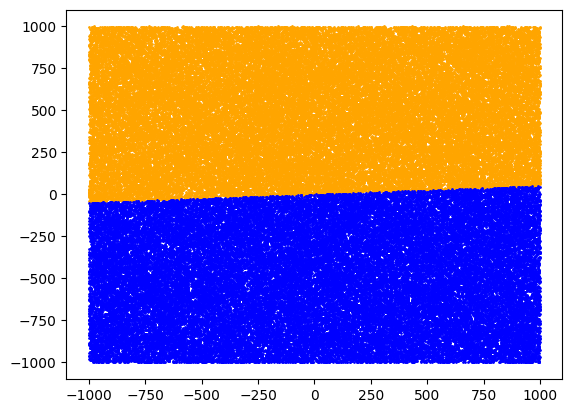

In [78]:
show_result_for_det(points_a, det_1)

Gdybyśmy wykonali tą operację dla wszystkich funkcji wyznaczników otrzymamy te same wyniki

┌─────────────┬────────┬───────────┬─────────┐
│   Tolerance │   Left │   On line │   Right │
├─────────────┼────────┼───────────┼─────────┤
│       1e-14 │  50271 │         5 │   49724 │
│       1e-12 │  50271 │         5 │   49724 │
│       1e-10 │  50271 │         5 │   49724 │
│       1e-08 │  50271 │         5 │   49724 │
└─────────────┴────────┴───────────┴─────────┘


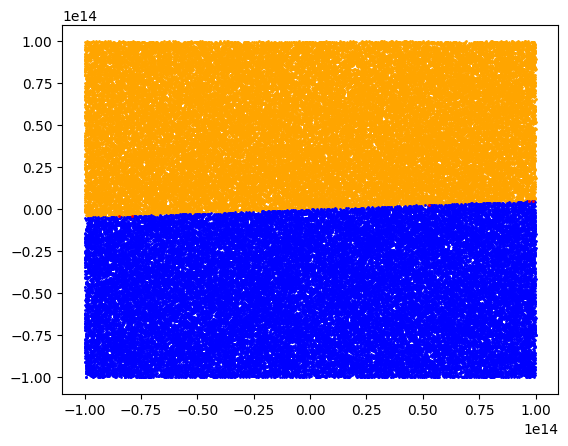

In [84]:
show_result_for_det(points_b, det_2)

┌─────────────┬────────┬───────────┬─────────┐
│   Tolerance │   Left │   On line │   Right │
├─────────────┼────────┼───────────┼─────────┤
│       1e-14 │    509 │         0 │     491 │
│       1e-12 │    509 │         0 │     491 │
│       1e-10 │    509 │         0 │     491 │
│       1e-08 │    509 │         0 │     491 │
└─────────────┴────────┴───────────┴─────────┘


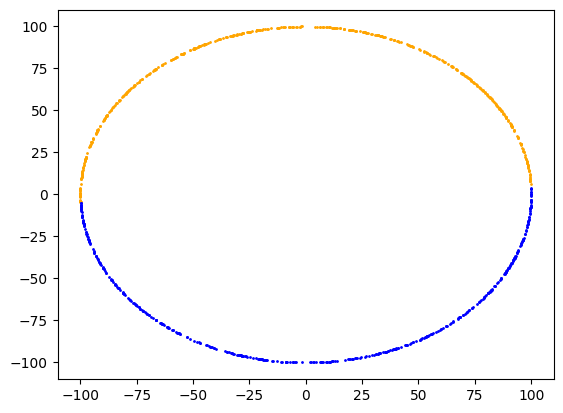

In [92]:
show_result_for_det(points_c, det_4)


In [3]:
show_result_for_det(points_d, det_3)

NameError: name 'points_d' is not defined

## Testowanie czasów kategoryzacji

In [54]:
from time import process_time

def show_times(points):
    line = ((-1.0, 0.0), (1.0, 0.1))
    tolerances = [10**(-14), 10**(-12), 10**(-10), 10**(-8)]
    determinants = [det_1, det_2, det_3, det_4]
    table = []
    for tol in tolerances:
        row = [tol]
        for i, det in enumerate(determinants):
            start = process_time()
            categorise_points(points, line[0], line[1], tol, det)
            stop = process_time()
            row.append(stop - start)
        table.append(row)
    print(tabulate(table, ["tolerance", "time det_1", "time det_2", "time det_3", "time det_4"], tablefmt="simple_outline"))


In [55]:
show_times(points_a)

┌─────────────┬──────────────┬──────────────┬──────────────┬──────────────┐
│   tolerance │   time det_1 │   time det_2 │   time det_3 │   time det_4 │
├─────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│       1e-14 │    0.184304  │    0.0932139 │     1.01749  │     0.852781 │
│       1e-12 │    0.111008  │    0.0960591 │     0.953772 │     0.821802 │
│       1e-10 │    0.094883  │    0.0809603 │     0.918635 │     0.815674 │
│       1e-08 │    0.0954337 │    0.080349  │     0.907566 │     0.817072 │
└─────────────┴──────────────┴──────────────┴──────────────┴──────────────┘


In [56]:
show_times(points_b)

┌─────────────┬──────────────┬──────────────┬──────────────┬──────────────┐
│   tolerance │   time det_1 │   time det_2 │   time det_3 │   time det_4 │
├─────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│       1e-14 │    0.104051  │    0.0811321 │     0.950775 │     0.849036 │
│       1e-12 │    0.0956163 │    0.0818135 │     1.01144  │     0.847581 │
│       1e-10 │    0.0941753 │    0.0848598 │     1.02344  │     0.928729 │
│       1e-08 │    0.102816  │    0.0887003 │     0.946896 │     0.833267 │
└─────────────┴──────────────┴──────────────┴──────────────┴──────────────┘


In [57]:
show_times(points_c)

┌─────────────┬──────────────┬──────────────┬──────────────┬──────────────┐
│   tolerance │   time det_1 │   time det_2 │   time det_3 │   time det_4 │
├─────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│       1e-14 │  0.00118158  │  0.000831316 │   0.0141005  │   0.0125998  │
│       1e-12 │  0.00112284  │  0.00108364  │   0.013267   │   0.00929959 │
│       1e-10 │  0.000962987 │  0.000782108 │   0.00992395 │   0.00857773 │
│       1e-08 │  0.000970921 │  0.000806965 │   0.0105211  │   0.00847213 │
└─────────────┴──────────────┴──────────────┴──────────────┴──────────────┘


In [58]:
show_times(points_d)

┌─────────────┬──────────────┬──────────────┬──────────────┬──────────────┐
│   tolerance │   time det_1 │   time det_2 │   time det_3 │   time det_4 │
├─────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│       1e-14 │   0.00189001 │  0.00119753  │   0.0147404  │   0.0167031  │
│       1e-12 │   0.00311227 │  0.00283094  │   0.0197316  │   0.0135812  │
│       1e-10 │   0.00124337 │  0.00101842  │   0.0153008  │   0.00974629 │
│       1e-08 │   0.00121616 │  0.000844735 │   0.00964279 │   0.0112854  │
└─────────────┴──────────────┴──────────────┴──────────────┴──────────────┘
